In [2]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR) # <- Update - Reomved this line as it's no longer compatible with the version of TF used.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

2024-03-23 23:10:15.811065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 23:10:31.142626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Matplotlib is building the font cache; this may take a moment.


In [6]:
X = np.load('images_48.npy')
y = np.load('labels_48.npy')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 0)

In [9]:
class_names = ['lg_2412b', 'lg_3001', 'lg_3002', 'lg_3003', 'lg_3004', 'lg_3005', 'lg_3010', 'lg_3622', 'lg_3648', 'lg_3839']

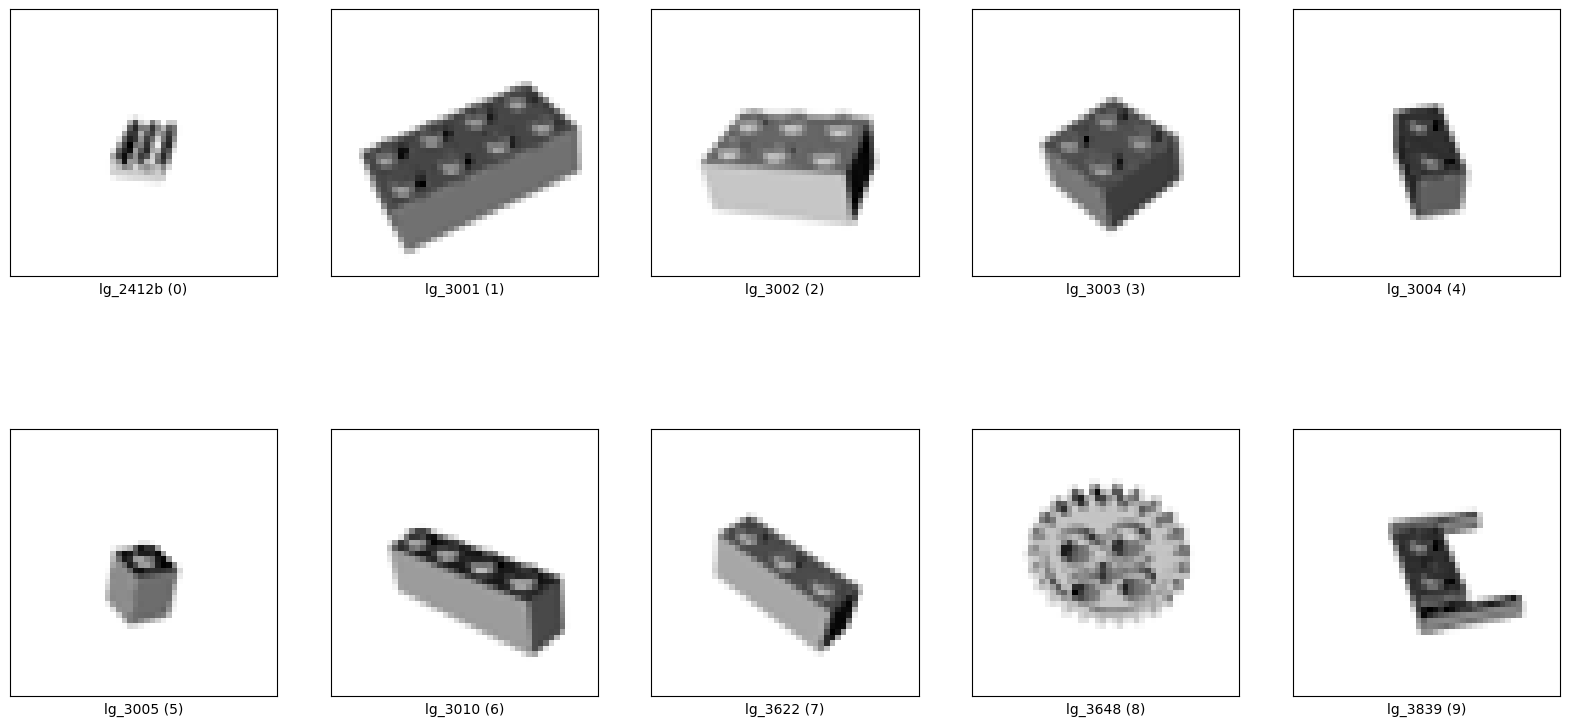

In [10]:
plt.figure(figsize = (20, 10))
for b in range(10):
    for i in range(len(y_train)):
        if y_train[i] == b:
            plt.subplot(2, 5, b + 1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(X_train[i], cmap = plt.cm.binary)
            plt.xlabel("{} ({})".format(class_names[y_train[i]], b))
            break 
plt.show()

In [6]:
tf.keras.backend.clear_session() 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (9, 9), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.key)

2024-01-09 04:19:32.823844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [1]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [8]:
e = model.fit(X_train.reshape(-1, 48, 48,1), y_train, epochs=5)


Epoch 1/5
41/41 [==============================] - 7s 151ms/step - loss: 1.7680 - accuracy: 0.3650
Epoch 2/5
41/41 [==============================] - 6s 150ms/step - loss: 0.6657 - accuracy: 0.7840
Epoch 3/5
41/41 [==============================] - 6s 152ms/step - loss: 0.2306 - accuracy: 0.9298
Epoch 4/5
41/41 [==============================] - 6s 151ms/step - loss: 0.1427 - accuracy: 0.9560
Epoch 5/5
41/41 [==============================] - 6s 154ms/step - loss: 0.0538 - accuracy: 0.9938


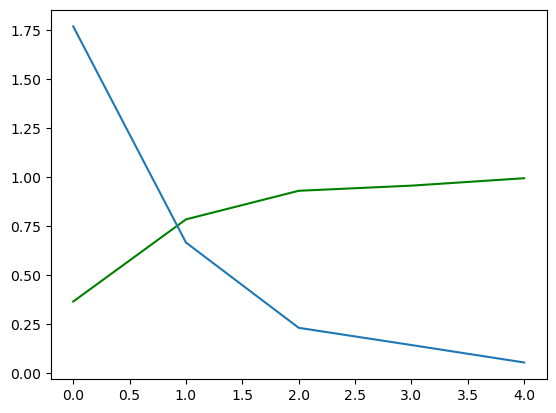

In [20]:
plt.plot(e.history['accuracy']) # <- Note minor change here from `acc` to `accuracy`. 
plt.plot(e.history['loss'])
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 35ms/step - loss: 0.0368 - accuracy: 1.0000
Test accuracy: 1.0


In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    plot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')

In [12]:
predictions = model.predict(X_test.reshape(-1, 48, 48, 1))

5/5 [==============================] - 0s 33ms/step


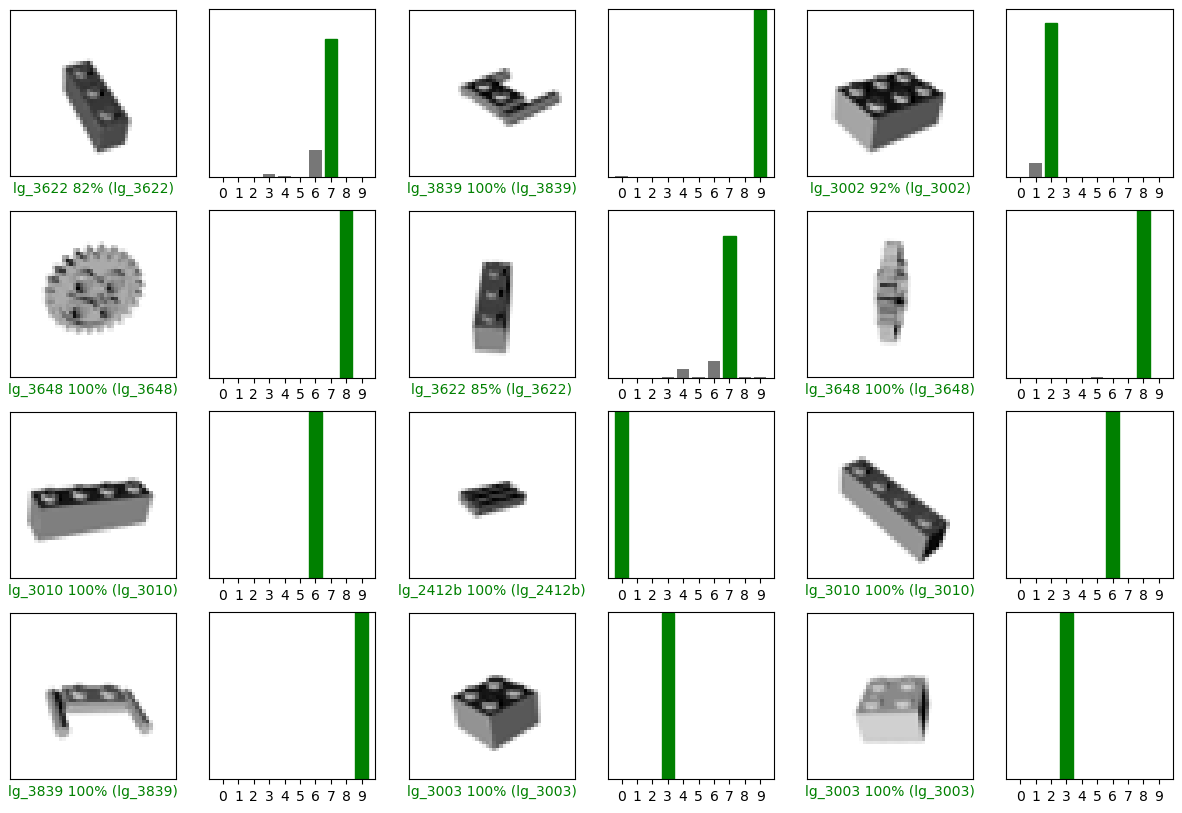

In [13]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(15, 10))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [14]:
import cv2
import PIL
import PIL.ImageOps
from PIL import Image, ImageEnhance
from skimage.util import random_noise

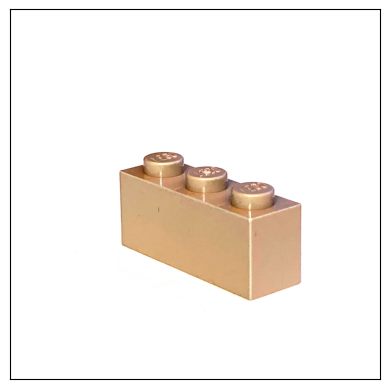

In [15]:
img = cv2.imread('lg_3622.jpg')
# img = cv2.imread('lg_3004.jpg')
# img = cv2.imread('lg_3002.jpg')

img = Image.fromarray(img)

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:

# enhancer = ImageEnhance.Contrast(img)
# factor = 0.3
# img = enhancer.enhance(factor)

# enhancer = ImageEnhance.Brightness(img)
# factor = 1.4
# img = enhancer.enhance(factor)

# enhancer = ImageEnhance.Sharpness(img)
# factor = 5
# img = enhancer.enhance(factor)

img = np.asarray(img)


# img = random_noise(img, mode='gaussian', var=0.001)
# img = np.array(255*img, dtype = 'uint8')

In [17]:

img = Image.fromarray(img)

img = PIL.ImageOps.invert(img)
img = img.convert('L')
img.thumbnail((48, 48))

img = np.array(img)
img = img.astype('float32')
data = img/255.0

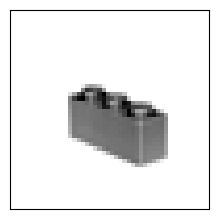

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(5,5,1)
plt.imshow(data, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
p = model.predict(data.reshape(1, 48, 48, 1)) # <- UPDATE: Minor update to the reshape here.
pp = p.argmax()
print("This is a photo of brick {} ({})".format(class_names[pp], pp))

1/1 [==============================] - 0s 25ms/step
This is a photo of brick lg_3003 (3)
